# Day 2: Exercises from the course "Machine Vision using Python (MVUP01)"

**Sessions**: (3) Introduction to Computer Vision and Image Processing; (4) Local Image Descriptors and Feature Mapping

**Instructor**: Gabriel Rodrigues Palma

**Objective**: This day focuses on the theoretical foundations of computer vision, detailing the main aspects.

# Session 3: Introduction to Computer Vision and Image Processing

In [1]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 26.9 MB/s eta 0:00:00


In [3]:
!pip install numpy

In [37]:
!pip install matplotlib

In [4]:
import cv2
import numpy as np

# Session 4: Local Image Descriptors and Feature Mapping

## Fundamentals of Digital Images

In [5]:
# Read image in BGR format (OpenCV default)
image = cv2.imread('CaputedImage.jpg')

In [12]:
image.shape

(108, 192, 3)

In [8]:
# Check pixel values at specific coordinates (row=100, column=50)
image[100, 50]

array([24, 58, 48], dtype=uint8)

In [9]:
b, g, r = image[100, 50] # OpenCV stores as BGR
print(f"BGR values at (100,50): Blue={b}, Green={g}, Red={r}") 

BGR values at (100,50): Blue=24, Green=58, Red=48


In [13]:
# Split into individual color channels
blue_ch, green_ch, red_ch = cv2.split(image)  

In [25]:
blue_ch

array([[231, 232, 231, ..., 202, 201, 200],
       [229, 228, 230, ..., 196, 197, 194],
       [224, 225, 227, ..., 201, 204, 203],
       ...,
       [  0,   4,   0, ...,  15,   3,   0],
       [  0,   0,   0, ...,  24,   8,   0],
       [ 13,   2,   0, ...,  21,   9,   2]], shape=(108, 192), dtype=uint8)

In [19]:
# Visualize individual channels in color
zeros = np.zeros_like(blue_ch)
blue_display = cv2.merge([blue_ch, zeros, zeros])  # Blue channel in color
green_display = cv2.merge([zeros, green_ch, zeros]) # Green channel
red_display = cv2.merge([zeros, zeros, red_ch])     # Red channel

In [31]:
# Display channel visualizations
cv2.imshow('Blue Channel', blue_display)
cv2.imshow('Green Channel', green_display)
cv2.imshow('Red Channel', red_display)
cv2.waitKey(0)  # Wait for key press
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [32]:
# Image visualisation with all channels
cv2.imshow('Original image', image)
cv2.waitKey(0)  # Wait for key press
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [33]:
# Image slicing and modification
modified = image.copy()
modified[100:110, :, 0] = 255  # Set blue channel (rows 100-110) to max [3]
modified[200:210, :, 1] = 255  # Set green channel (rows 200-210)
modified[300:310, :, 2] = 255  # Set red channel (rows 300-310)

cv2.imshow('Modified Image', modified)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Basic image statistics

In [113]:
# Split the image into its RGB channels
blue_channel, green_channel, red_channel = cv2.split(image)

In [119]:
# Function to calculate basic statistics for a given channel
def calculate_statistics(channel):
    stats = {
        "mean": np.mean(channel),
        "std_dev": np.std(channel),
        "min": np.min(channel),
        "max": np.max(channel)
    }
    return stats


In [115]:
# Calculate statistics for each channel
blue_stats = calculate_statistics(blue_channel)
green_stats = calculate_statistics(green_channel)
red_stats = calculate_statistics(red_channel)

In [118]:
# Print the results
print("Blue Channel Statistics:")
print(blue_stats)
print("\nGreen Channel Statistics:")
print(green_stats)
print("\nRed Channel Statistics:")
print(red_stats)

Blue Channel Statistics:
{'mean': np.float64(152.496436042524), 'std_dev': np.float64(85.55766375060415), 'min': np.uint8(0), 'max': np.uint8(255)}

Green Channel Statistics:
{'mean': np.float64(137.12149691358024), 'std_dev': np.float64(47.37410983584465), 'min': np.uint8(0), 'max': np.uint8(255)}

Red Channel Statistics:
{'mean': np.float64(39.272794924554184), 'std_dev': np.float64(51.199604768029104), 'min': np.uint8(0), 'max': np.uint8(255)}


In [109]:
import cv2
import matplotlib.pyplot as plt

# Global variable to store selected points
selected_points = []

# Mouse callback function to select points
def select_points(event, x, y, flags, param):
    """Callback function to store selected points on mouse click."""
    global selected_points
    if event == cv2.EVENT_LBUTTONDOWN:
        selected_points.append((x, y))
        print(f"Point selected: {x}, {y}")

# Function to manually select square regions
def manual_selection(image_path):
    """Allows manual selection of two points in the image (water and island)."""
    global selected_points

    # Load the image
    image = cv2.imread(image_path)
    image_copy = image.copy()

    # Create a window and set the mouse callback
    cv2.namedWindow('Select Points')
    cv2.setMouseCallback('Select Points', select_points)

    print("Click on two points: one in the water region and one in the island region.")

    while True:
        # Display the image
        cv2.imshow('Select Points', image_copy)

        # Break the loop after selecting two points
        if len(selected_points) == 2:
            break

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cv2.waitKey(1)
    return selected_points

# Function to extract and display square regions
def display_selected_regions(image_path, points, square_size=50):
    """Displays square regions around selected points."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract square regions around selected points
    water_point, island_point = points

    # Ensure square regions do not exceed image boundaries
    h, w, _ = image.shape
    x_w, y_w = max(0, water_point[1] - square_size // 2), max(0, water_point[0] - square_size // 2)
    x_i, y_i = max(0, island_point[1] - square_size // 2), max(0, island_point[0] - square_size // 2)

    water_square = image_rgb[x_w:x_w + square_size, y_w:y_w + square_size]
    island_square = image_rgb[x_i:x_i + square_size, y_i:y_i + square_size]

    # Calculate statistics
    water_stats = calculate_rgb_stats(water_square)
    island_stats = calculate_rgb_stats(island_square)

    # Plot results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(water_square)
    plt.title('Water Region (Square)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(island_square)
    plt.title('Island Region (Square)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return(water_stats, island_stats)
    

def calculate_rgb_stats(region):
    """
    Calculate RGB statistics for a given region.
    
    Parameters
    ----------
    region : ndarray
        RGB image region
        
    Returns
    -------
    dict
        Dictionary containing mean, dispersion, and 2.5 percentile for each channel
    """
    stats = {}
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        channel = region[:,:,i]
        stats[color] = {
            'mean': np.mean(channel),
            'dispersion': np.std(channel),
            'percentile_2.5': np.percentile(channel, 2.5)
        }
    return stats

Click on two points: one in the water region and one in the island region.
Point selected: 630, 674
Point selected: 184, 592
Selected points: [(630, 674), (184, 592)]


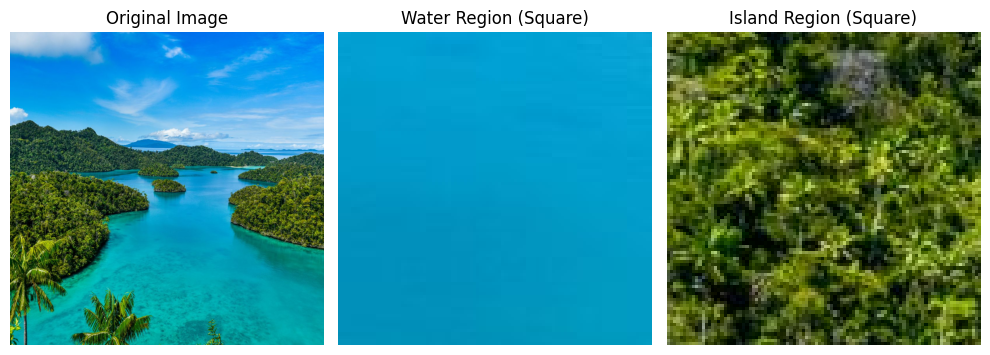

In [110]:
# Example usage
image_path = 'Island1.jpg'  # Replace with your image path
points = manual_selection(image_path)  # Select two points manually
print(f"Selected points: {points}")
water_stats, island_stats = display_selected_regions(image_path, points, square_size=100)

In [111]:
water_stats['Blue']

{'mean': np.float64(198.5987),
 'dispersion': np.float64(9.104200036796206),
 'percentile_2.5': np.float64(185.0)}

In [112]:
island_stats['Blue']

{'mean': np.float64(22.8878),
 'dispersion': np.float64(26.3196164706099),
 'percentile_2.5': np.float64(0.0)}

## Basic Filtering operations

In [38]:
import matplotlib.pyplot as plt

In [135]:
def separate_water_island(image_path):
    """Separate water from the island in the image using pixel filtering."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define thresholds for water (blueish regions)
    lower_blue = np.array([90, 50, 50])  # Adjust based on the image
    upper_blue = np.array([130, 255, 255])
    
    # Convert to HSV for better color segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for water
    water_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Invert the mask for the island
    island_mask = cv2.bitwise_not(water_mask)

    # Extract water and island regions
    water = cv2.bitwise_and(image_rgb, image_rgb, mask=water_mask)
    island = cv2.bitwise_and(image_rgb, image_rgb, mask=island_mask)

    # Plot the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(water)
    plt.title('Water Region')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(island)
    plt.title('Island Region')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [121]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [125]:
print(np.min(hsv_image[:, :, 1]))
print(np.max(hsv_image[:, :, 1]))

0
255


In [126]:
print(np.min(hsv_image[:, :, 2]))
print(np.max(hsv_image[:, :, 2]))

0
255


In [128]:
print(np.min(hsv_image[:, :, 0]))
print(np.max(hsv_image[:, :, 0]))

0
177


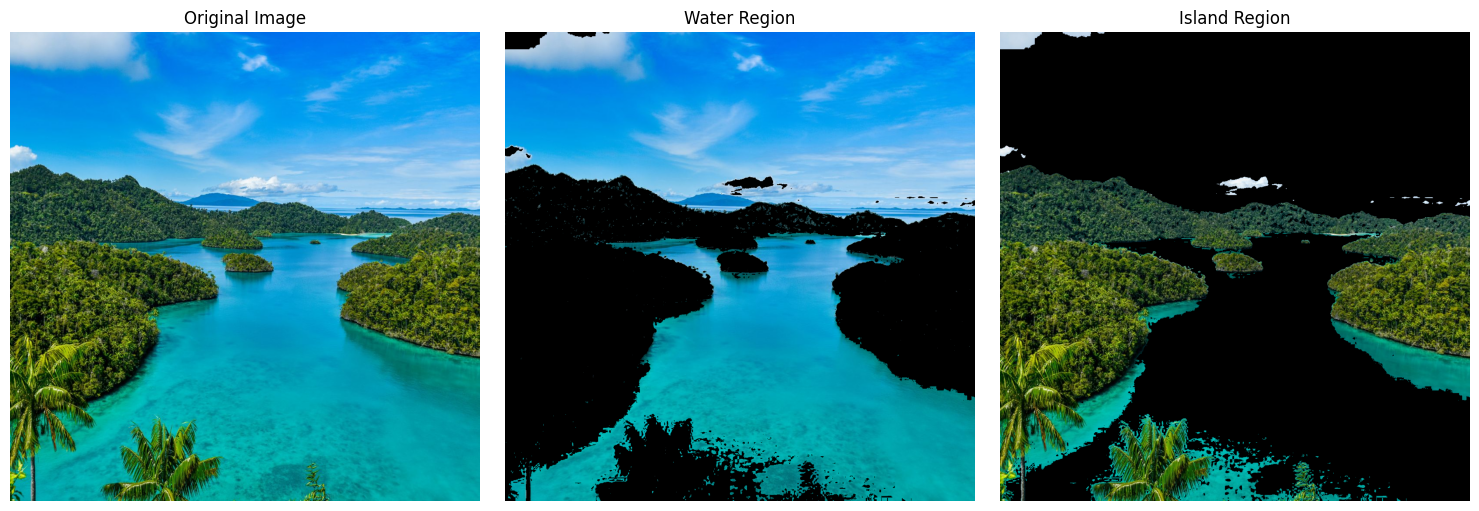

In [52]:
# Example usage
separate_water_island('Island1.jpg')

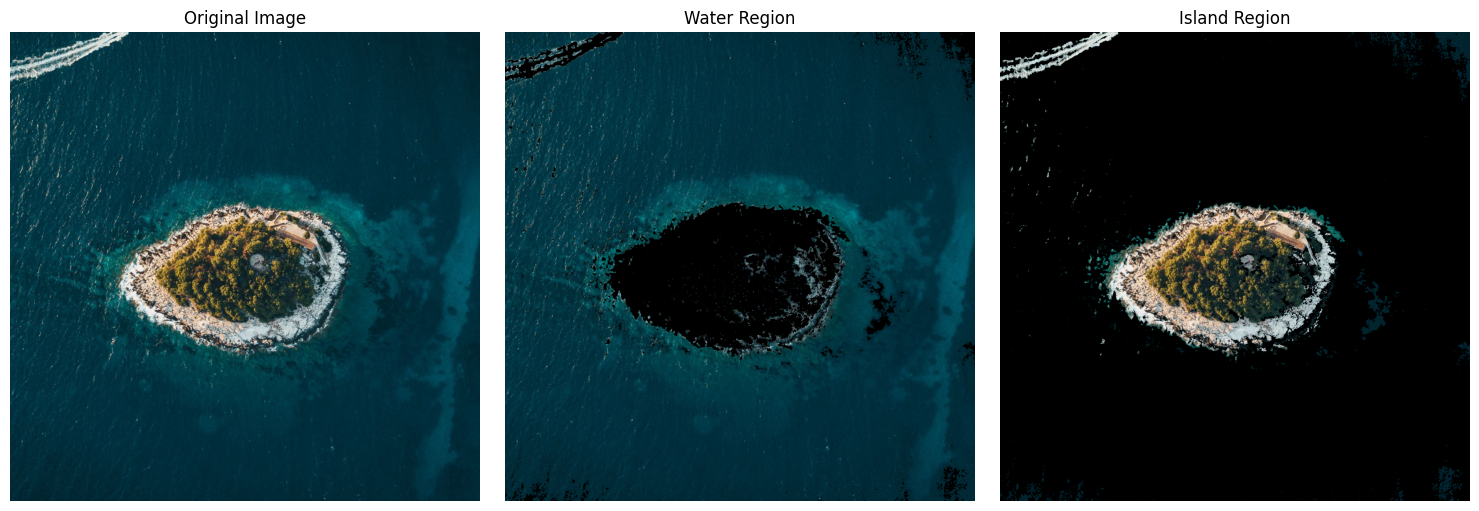

In [133]:
# Example usage
separate_water_island('Island2.jpg')

In [40]:
def count_water_island_pixels(image_path):
    """Count the number of pixels classified as water and island."""
    # Load the image
    image = cv2.imread(image_path)

    # Convert to HSV for better segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define thresholds for water (blueish regions)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Create masks for water and island
    water_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    
    # Count pixels
    total_pixels = image.shape[0] * image.shape[1]
    water_pixels = np.count_nonzero(water_mask)
    island_pixels = total_pixels - water_pixels

    print(f"Total Pixels: {total_pixels}")
    print(f"Water Pixels: {water_pixels}")
    print(f"Island Pixels: {island_pixels}")

# Example usage
count_water_island_pixels('Island1.jpg')

Total Pixels: 1166400
Water Pixels: 743440
Island Pixels: 422960


In [169]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image_path):
    """
    Demonstrates basic Sobel edge detection on a grayscale image.
    
    Steps:
    1. Convert to grayscale
    2. Apply Sobel operators (x/y gradients)
    3. Compute edge magnitude/direction
    """
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel filtering
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    magnitude = np.hypot(sobel_x, sobel_y)  # Edge strength
    direction = np.arctan2(sobel_y, sobel_x)  # Edge orientation
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(sobel_x, cmap='coolwarm')
    plt.title('Horizontal Edges (Gx)')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(sobel_y, cmap='coolwarm')
    plt.title('Vertical Edges (Gy)')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(magnitude, cmap='viridis')
    plt.title('Edge Magnitude')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

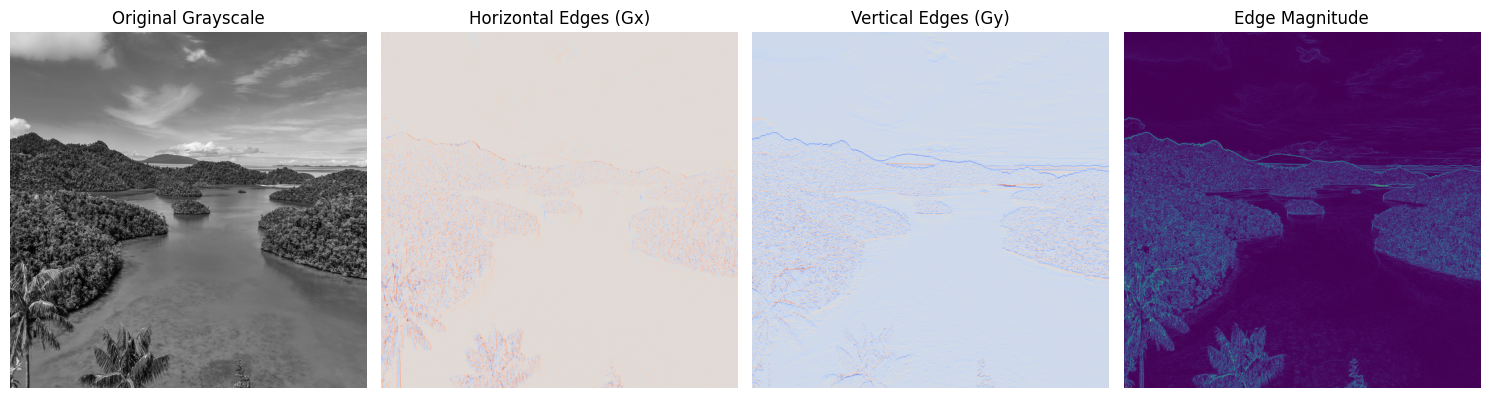

In [170]:
sobel_edge_detection('island1.jpg')

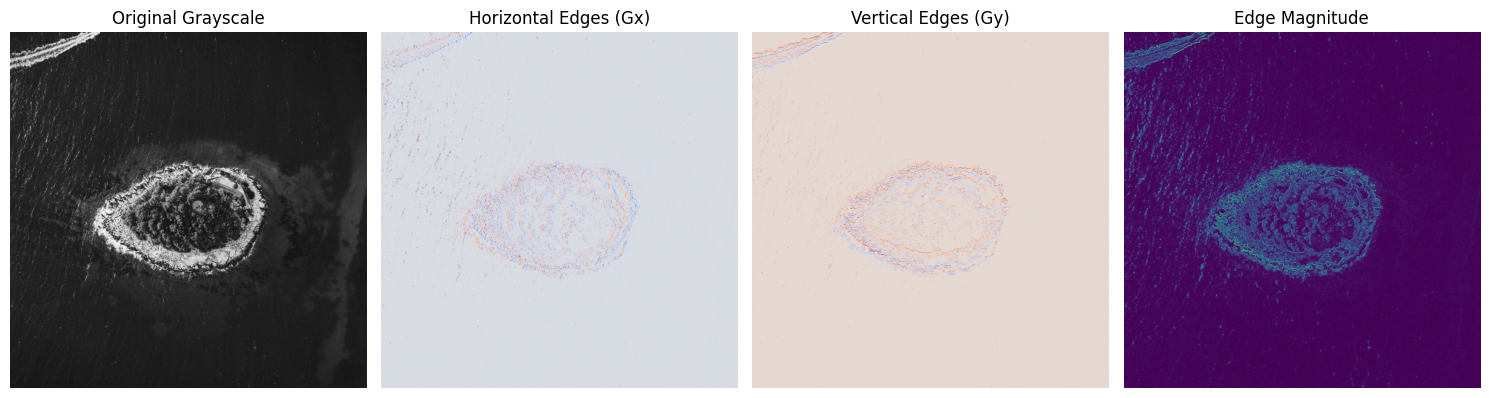

In [151]:
sobel_edge_detection('island2.jpg')

In [161]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 34.1 MB/s eta 0:00:00a 0:00:01


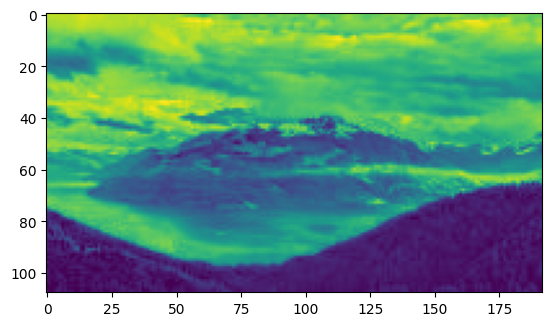

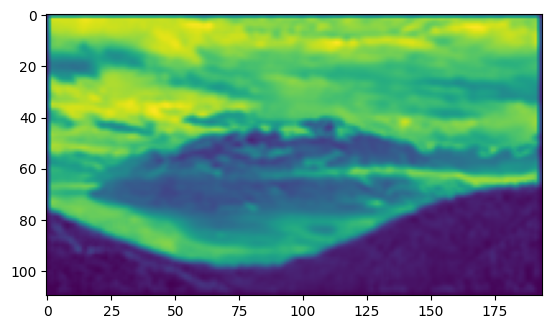

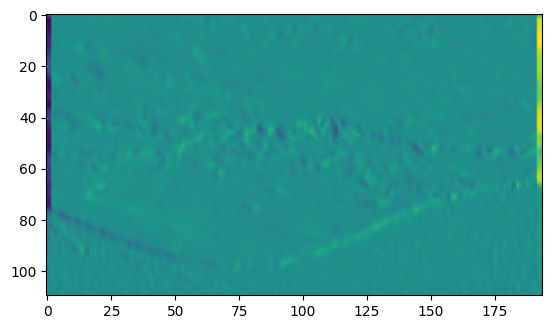

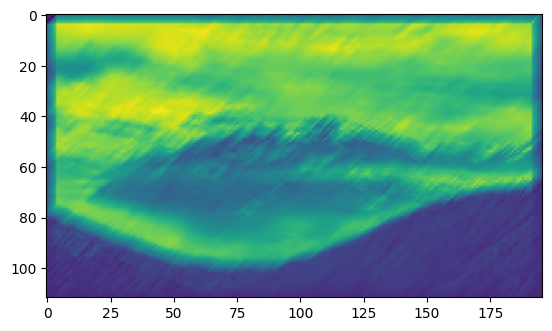

In [163]:
# playing with convolution kernels

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

# read source image, and take a single channel
img = mpimg.imread('CaputedImage.jpg')[:,:,2] # 0=red, 1=green, 2=blue
plt.imshow(img)
plt.show()

# define various 2d convolution kernels
kernel_blur = np.array(
    [[ .1, .1, .1 ],
     [ .1, .2, .1 ],
     [ .1, .1, .1 ]])

kernel_edges = np.array(
    [[ -1, 0, 1 ],
     [ -1, 0, 1 ],
     [ -1, 0, 1 ]])

kernel_custom = np.array(
    [[  0.0,  0.0,  0.0, -1.0,  3.0 ],
     [  0.0,  0.0, -1.0,  3.0, -1.0 ],
     [  0.0, -1.0,  3.0, -1.0,  0.0 ],
     [ -1.0,  3.0, -1.0,  0.0,  0.0 ],
     [  3.0, -1.0,  0.0,  0.0,  0.0 ]])

# convolve and display
convolved = signal.convolve2d(img, kernel_blur)
plt.imshow(convolved)
plt.show()

convolved = signal.convolve2d(img, kernel_edges)
plt.imshow(convolved)
plt.show()

convolved = signal.convolve2d(img, kernel_custom)
plt.imshow(convolved)
plt.show()

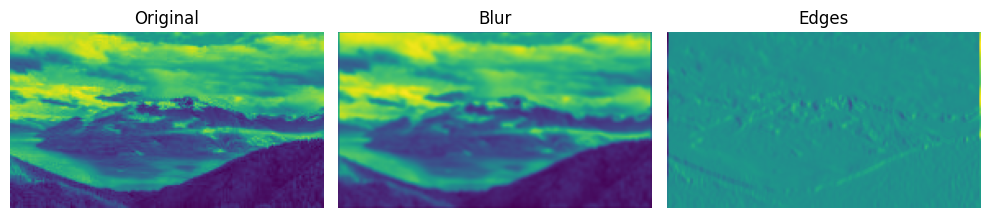

In [166]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def apply_convolution(image, kernel):
    """
    Apply 2D convolution to image using given kernel
    """
    # Flip kernel for proper convolution
    kernel = np.flip(kernel)
    
    # Calculate padding needed
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    # Add zero padding
    padded = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), 
                   mode='constant')
    
    # Create output array
    result = np.zeros_like(image, dtype=np.float32)
    
    # Simple convolution operation
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            region = padded[y:y+kernel.shape[0], x:x+kernel.shape[1]]
            result[y, x] = np.sum(region * kernel)
            
    return result

def show_image_effects(image_path):
    """
    Demonstrate different convolution effects on an image
    """
    try:
        # Load image safely
        img = mpimg.imread(image_path)
        if img is None:
            raise FileNotFoundError("Image not found")
            
        # Use green channel for better visibility
        original_channel = img[:, :, 1].astype(np.float32)
        
        # Define simple kernels
        kernels = {
            'Blur': np.array([
                [0.1, 0.1, 0.1],
                [0.1, 0.2, 0.1],
                [0.1, 0.1, 0.1]
            ]),
            'Edges': np.array([
                [-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]
            ])
        }
        
        # Create plot
        plt.figure(figsize=(10, 5))
        
        # Show original
        plt.subplot(1, len(kernels)+1, 1)
        plt.imshow(original_channel)
        plt.title('Original')
        plt.axis('off')
        
        # Show filtered versions
        for i, (name, kernel) in enumerate(kernels.items(), 2):
            filtered = apply_convolution(original_channel, kernel)
            
            plt.subplot(1, len(kernels)+1, i)
            plt.imshow(filtered)
            plt.title(name)
            plt.axis('off')
            
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}. Check if '{image_path}' exists.")

# To use: specify your image path
show_image_effects('CaputedImage.jpg')


# Session 4: Local Image Descriptors and Feature Mapping

### Harris Corner Detector

In [216]:
# Import required libraries for image processing
import cv2  # OpenCV for computer vision operations
import numpy as np  # NumPy for numerical operations

# Load the input image in BGR format (OpenCV's default color space)
filename = 'leaf2.jpg'
img = cv2.imread(filename)

# Convert image to grayscale for corner detection processing
# Color information isn't needed for corner detection algorithms
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert grayscale image to float32 format required by cornerHarris
gray_float32 = np.float32(gray)

# Apply Harris corner detection algorithm with parameters:
# - blockSize: Neighborhood size (2x2) for corner detection
# - ksize: Aperture parameter (3x3) for Sobel operator
# - k: Harris detector free parameter (0.04 typical value)
corner_response = cv2.cornerHarris(gray_float32, blockSize=2, ksize=3, k=0.04)

# Dilate the corner response map to enhance corner visibility
# This helps make detected corners more prominent in the output
dilated_response = cv2.dilate(corner_response, None)

# Set threshold for corner detection as 1% of maximum response value
# This value can be adjusted (higher=stricter, lower=more corners)
threshold = 0.001 * dilated_response.max()

# Mark detected corners on original image by setting red pixels [B,G,R]
# Pixels exceeding threshold are colored red (0,0,255 in BGR format)
img[dilated_response > threshold] = [0, 0, 255]

In [217]:
# Image visualisation with all channels
cv2.imshow('Harris Corner Detector', img)
cv2.waitKey(0)  # Wait for key press
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### SIFT—Scale-Invariant Feature Transform

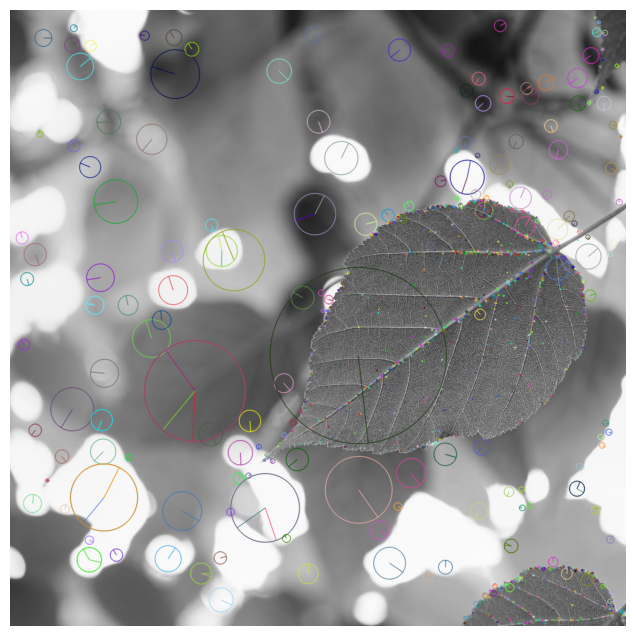

In [222]:
import cv2
import matplotlib.pyplot as plt
# Read input image
img = cv2.imread('leaf2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()
# Detect keypoints (without descriptors)
keypoints = sift.detect(img, None)

# Draw keypoints on image (with size and orientation)
output_img = cv2.drawKeypoints(
    img, 
    keypoints,
    outImage=None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display results
plt.figure(figsize=(12, 8))
plt.imshow(output_img)
plt.axis('off')
plt.show()


## Matching Descriptors

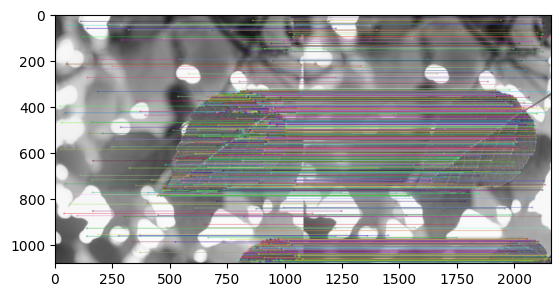

(<matplotlib.image.AxesImage at 0x142862c10>, None)

In [235]:
import cv2
import matplotlib.pyplot as plt

# 1. Read images
img1 = cv2.imread('leaf2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('leaf2.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Initialize SIFT detector
sift = cv2.SIFT_create()
# 3. Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# 4. Feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)
# 5. Lowe's ratio test
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

# 6. Draw matches
matched_img = cv2.drawMatchesKnn(
    img1, keypoints1,
    img2, keypoints2,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS    
)
plt.imshow(matched_img), plt.show()


In [245]:
import cv2
import numpy as np

def detect_wildlife_movement(img_path1, img_path2):
    # Load time-series habitat images
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)    
    # SIFT feature detection
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Feature matching
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    # Ratio test with conservative threshold
    good_matches = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good_matches.append(m)

    # Draw matches with movement vectors
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, 
                                 good_matches[:50], None,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
                                 matchColor=(0,255,0))
    # Calculate displacement vectors
    displacements = []
    for match in good_matches:
        (x1, y1) = kp1[match.queryIdx].pt
        (x2, y2) = kp2[match.trainIdx].pt
        displacements.append((x2-x1, y2-y1))
    
    return matched_img, displacements

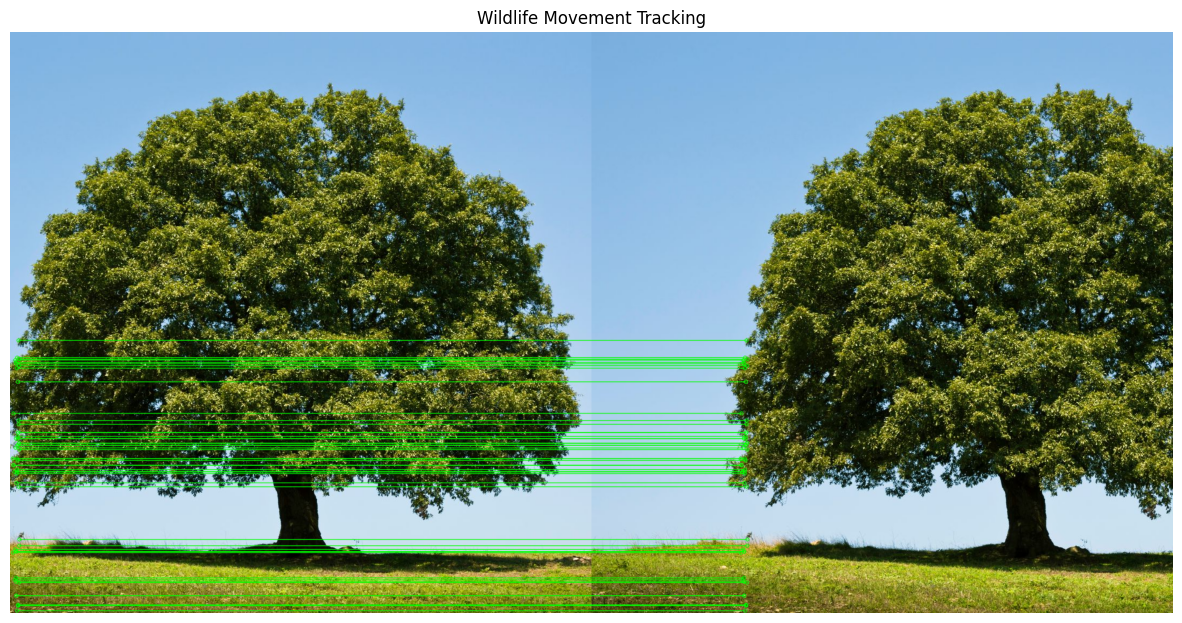

Detected 7701 significant displacements


In [248]:
# Usage example
result_img, movements = detect_wildlife_movement('tree1.jpg', 'tree2.jpg')

# Visualization
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title('Wildlife Movement Tracking')
plt.axis('off')
plt.show()

print(f"Detected {len(movements)} significant displacements")


In [249]:
def calculate_descriptor_distance(desc1, desc2):
    # Euclidean distance (NORM_L2)
    return np.sqrt(np.sum((desc1 - desc2)**2))
    
    # Alternative: Manhattan distance (NORM_L1)
    # return np.sum(np.abs(desc1 - desc2))


In [250]:
# Pseudocode of internal KNN matching process
def knn_match(des1, des2, k):
    matches = []
    for d1 in des1:
        # Calculate distances to all descriptors in des2
        distances = []
        for d2 in des2:
            dist = calculate_descriptor_distance(d1, d2)
            distances.append((dist, d2_idx))
            
        # Sort and get k nearest
        distances.sort()
        k_nearest = distances[:k]
        matches.append(k_nearest)
    return matches


In [251]:
# Load time-series habitat images
img1 = cv2.imread('tree1.jpg')
img2 = cv2.imread('tree2.jpg')    
# SIFT feature detection
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [252]:
knn_match(des1, des2, k = 3)

NameError: name 'd2_idx' is not defined

In [253]:
import numpy as np

def calculate_descriptor_distance(desc1, desc2):
    # Euclidean distance (NORM_L2)
    return np.sqrt(np.sum((desc1 - desc2) ** 2))

def knn_match(des1, des2, k):
    matches = []
    # Iterate over each descriptor in des1 with its index
    for i, d1 in enumerate(des1):
        distances = []
        # Compute distance to each descriptor in des2 with index j
        for j, d2 in enumerate(des2):
            dist = calculate_descriptor_distance(d1, d2)
            distances.append((dist, j))
        # Sort the distances by the computed Euclidean distance
        distances.sort(key=lambda x: x[0])
        # Get the k nearest neighbors (k smallest distances)
        k_nearest = distances[:k]
        matches.append(k_nearest)
    return matches

Total descriptors in image1: 165
Total raw matches: 165
Good matches after ratio test: 165


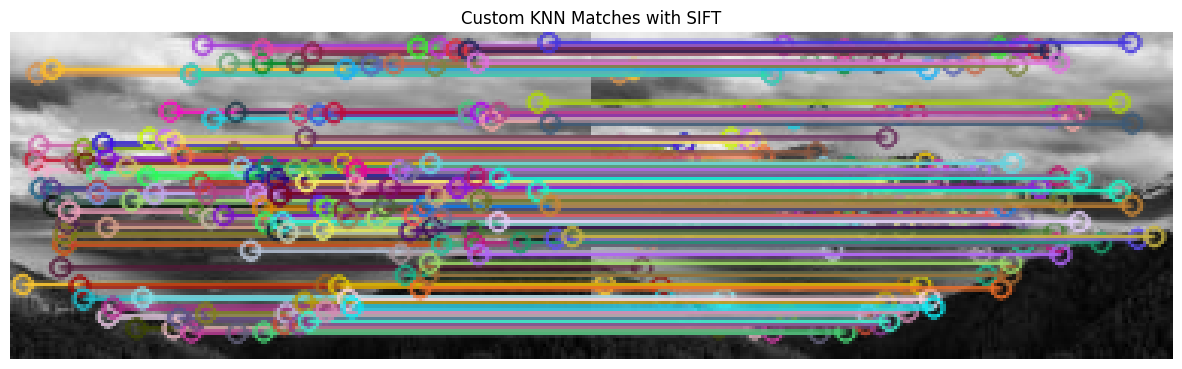

In [255]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Custom KNN Matching Functions ---
def calculate_descriptor_distance(desc1, desc2):
    # Euclidean distance (NORM_L2)
    return np.sqrt(np.sum((desc1 - desc2) ** 2))

def knn_match(des1, des2, k):
    matches = []
    for i, d1 in enumerate(des1):
        distances = []
        for j, d2 in enumerate(des2):
            dist = calculate_descriptor_distance(d1, d2)
            distances.append((dist, j))  # (distance, index of descriptor in des2)
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        matches.append(k_nearest)
    return matches

# --- Load Two Time-Series Habitat Images ---
img1 = cv2.imread('CaputedImage.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('CaputedImage.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise ValueError("One or both images could not be loaded. Please verify the filenames.")

# --- SIFT Feature Detection ---
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

if des1 is None or des2 is None:
    raise ValueError("No descriptors found in one or both images.")

# --- Apply Custom KNN Matching ---
k = 2
raw_matches = knn_match(des1, des2, k)

# --- Optional: Apply Lowe's Ratio Test ---
# For each descriptor in des1, check if the best match is significantly better than the second-best.
good_matches = []
for match_pair in raw_matches:
    if len(match_pair) == 2:
        m, n = match_pair  # m and n are tuples (distance, index in des2)
        if m[0] < 0.7 * n[0]:
            # Store the index of the best match. You could also save more info if needed.
            good_matches.append((m[0], m[1]))

print("Total descriptors in image1:", len(des1))
print("Total raw matches:", len(raw_matches))
print("Good matches after ratio test:", len(good_matches))

# --- (Optional) Visualize Matches Using OpenCV's drawMatches ---
# First we convert the tuple good_matches into a list of cv2.DMatch objects.
# Note: For visualization, especially with drawMatches, you need a DMatch object.
matches_for_drawing = []
for i, match_pair in enumerate(raw_matches):
    if len(match_pair) == 2:
        m, n = match_pair
        if m[0] < 0.7 * n[0]:
            # Create a DMatch with queryIdx, trainIdx, and distance
            dm = cv2.DMatch(_queryIdx=i, _trainIdx=m[1], _distance=m[0])
            matches_for_drawing.append(dm)

matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches_for_drawing, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15, 8))
plt.imshow(matched_img, cmap='gray')
plt.title('Custom KNN Matches with SIFT')
plt.axis('off')
plt.show()


## Putting It All Together 